<div style="padding:10px;background-color: #FF4D4D; color:white;font-size:28px;"><strong>Seaborn</strong></div>

Seaborn es una biblioteca de visualización construida sobre Matplotlib orientada al análisis estadístico.

Por convención, importamos Seaborn como `sns`.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Vamos a cargar algunos datos para comenzar a graficar.

In [6]:
Vino = pd.read_csv('../data/vino.csv')

In [7]:
Vino.head()

,pais,continente,alcohol,muertes,cardio,hepatic
0,Australia,Oceania,2.5,785.0,211,15.3
1,Austria,Europa,3.9,863.0,167,45.6
2,Belg/Lux,Europa,2.9,883.0,131,20.7
3,Canada,America,2.4,793.0,191,16.4
4,Denmark,Europa,2.9,971.0,220,23.9


In [8]:
Vino = Vino.set_index('pais')

In [9]:
Vino.head()

,continente,alcohol,muertes,cardio,hepatic
pais,,,,,
Australia,Oceania,2.5,785.0,211,15.3
Austria,Europa,3.9,863.0,167,45.6
Belg/Lux,Europa,2.9,883.0,131,20.7
Canada,America,2.4,793.0,191,16.4
Denmark,Europa,2.9,971.0,220,23.9


Esta tabla contiene los siguientes datos:

variable   | desc
-----------|---
pais       |          
continente |     
alcohol    |      litros de alcohol proveniente de vino, per capita
muertes    |      muertes por cada 100,000 habitantes
cardio     |      muertes por enfermedades cardiacas por cada 100,000 habitantes
hepatic    |      muertes por enfermedades hepáticas por cada 100,000 habitantes

Sabemos que podemos crear un diagrama de dispersión (scatterplot) de litros de alcohol ingeridos contra muertes por enfermedades cardiacas utilizando Matplotlib.

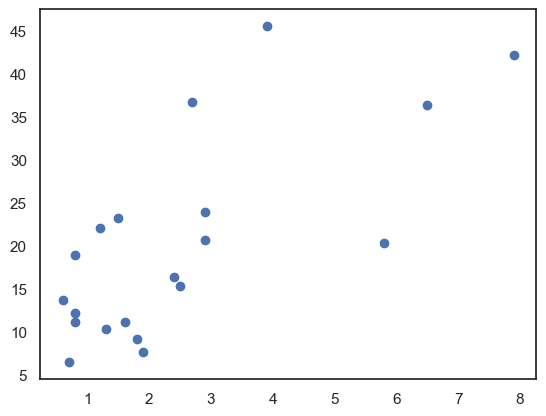

In [66]:
plt.scatter(Vino.alcohol, Vino.hepatic)

En un flujo de trabajo típico, podríamos crear un diagrama de dispersión como este, luego calcular la recta de regresión de mejor ajuste (por ejemplo utilizando el paquete estadístico `statsmodels`). 

Después, superpondríamos la línea de tendencia sobre el diagrama.

Seaborn hace todo esto por nosotros.

<Axes: xlabel='alcohol', ylabel='hepatic'>

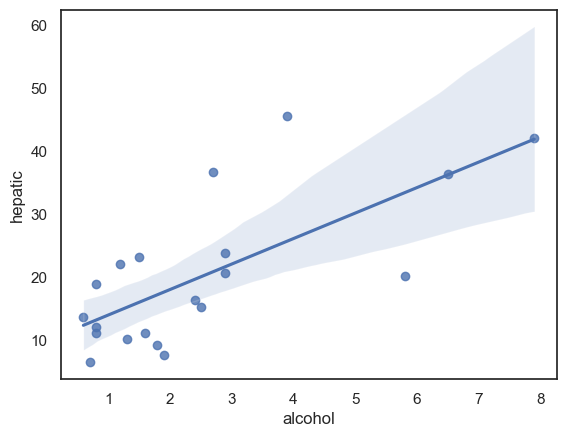

In [64]:
sns.regplot(x = 'alcohol',y = 'hepatic', data = Vino)

También obtenemos una región sombreada que representa un intervalo de confianza del 95%. A un nivel muy general, este intervalo representa un conjunto de líneas de regresión que podrían considerarse estimaciones razonables de la relación verdadera.

Estos gráficos contienen sus propios parámetros para personalizar. Veamos ahora el gráfico de consumo de alcohol en vino contra muertes por enfermedad cardiaca.

matplotlib.axes._axes.Axes

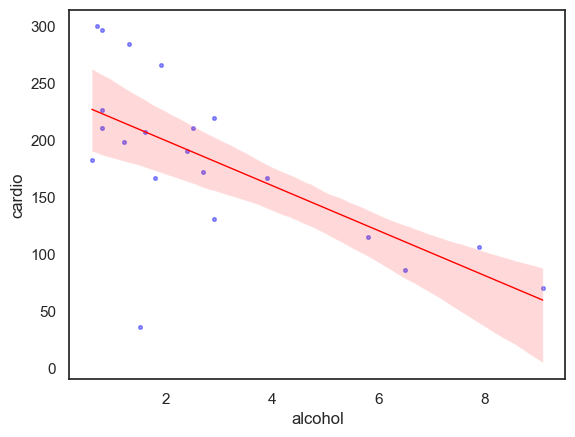

In [141]:
type(sns.regplot(x = 'alcohol',
            y = 'cardio', 
            data = Vino, 
            color="blue",
            scatter_kws= {'s': 7, 'alpha': 0.4},
            line_kws = {'color': "red", 'lw': 1}))

Pero además, lo que contiene este objeto tras bambalinas es un tipo `Axes` de `matplotlib`, por lo tanto podemos dar formato de la misma manera que hemos hecho con matplotlib hasta este momento.

In [132]:
fontTit = {'family':'serif','color':'coral','size': 12, 'fontweight': 'bold'}
fontEti = {'family':'serif','color':'coral','size': 8, 'fontweight': 'bold'}

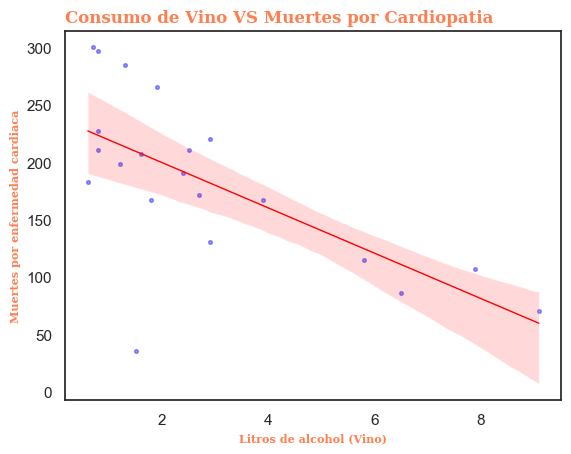

In [134]:
fig, ax = plt.subplots(1,1)
ax = sns.regplot(x = 'alcohol',
                 y = 'cardio', 
                 data = Vino, 
                 color="blue",
                 scatter_kws= {'s': 7, 'alpha': 0.4},
                 line_kws = {'color': "red", 'lw': 1})

ax.set_title('Consumo de Vino VS Muertes por Cardiopatia', fontdict = fontTit, loc = 'left')
ax.set_ylabel('Muertes por enfermedad cardiaca', fontdict = fontEti)
ax.set_xlabel('Litros de alcohol (Vino)', fontdict = fontEti)  

fig.savefig('vino.png', bbox_inches = 'tight') # Nueva línea

Seaborn también cuenta con un método completo para crear gráficos de barras (barplot). Podemos crear estos gráficos con Matplotlib, pero Seaborn facilita la creación de visualizaciones más sofisticadas. 

En este caso, veamos el número promedio de muertes, agrupado por número de habitaciones y por continente.

<Axes: xlabel='alcohol', ylabel='muertes'>

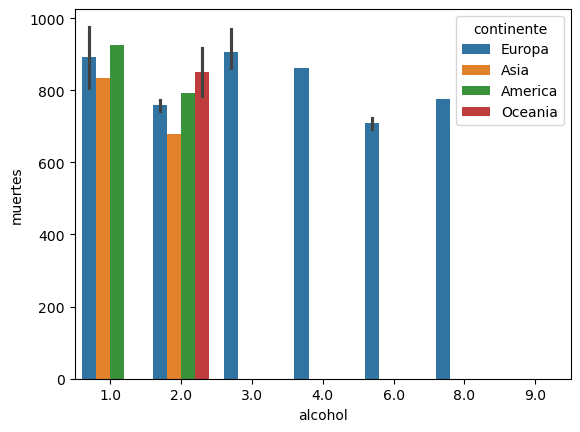

In [16]:
sns.barplot(x = 'alcohol', y = 'muertes', hue = 'continente', data = Vino.round(0))

Seaborn también añade automáticamente barras de error que a grandes rasgos, es una forma de estimar cuánta incertidumbre hay en cada media. Podemos ver, sin embargo, que algunas barras no tienen barras de error, eso significa que para esa categoría hubo únicamente un punto de datos.

Por último, es muy útil recurrir a Seaborn cuando queremos crear un buen heatmap de correlaciones.

In [17]:
c = Vino.drop('continente', axis=1).corr()
c

,alcohol,muertes,cardio,hepatic
alcohol,1.000000,-0.382005,-0.661336,0.713896
muertes,-0.382005,1.000000,0.743679,-0.151953
cardio,-0.661336,0.743679,1.000000,-0.563523
hepatic,0.713896,-0.151953,-0.563523,1.000000


<Axes: >

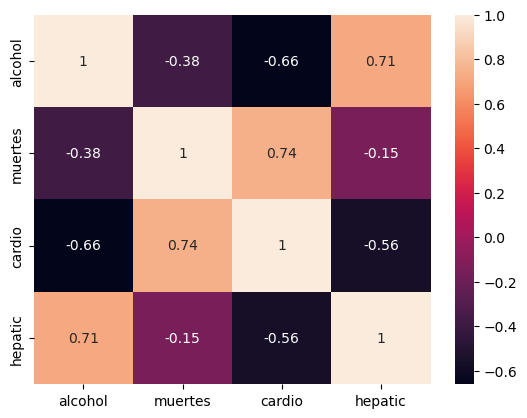

In [18]:
sns.heatmap(c, annot = True)

Para reducir la redundancia a menudo querremos ocultar el triángulo superior derecho, que es la imagen reflejada del triángulo inferior izquierdo.

Podemos hacer esto utilizando el argumento `mask`.

In [171]:
mask = np.ones_like(c, dtype = np.bool_) # Arreglo de 1's con la misma forma de c
mask = np.triu(mask) # Matriz triangular superior
mask = np.invert(mask).T # Invertir booleanos de la matriz
mask

array([[False,  True,  True,  True],
       [False, False,  True,  True],
       [False, False, False,  True],
       [False, False, False, False]])

<Axes: >

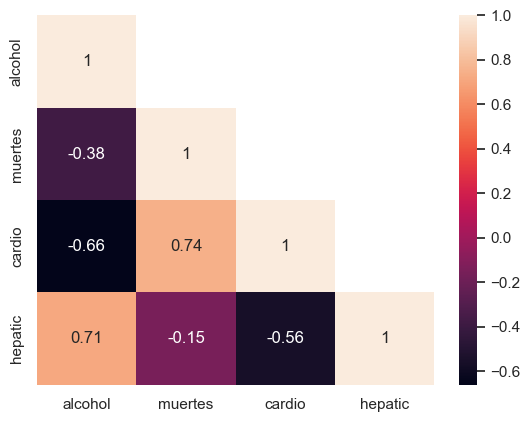

In [173]:
sns.heatmap(c, annot = True, mask = mask)

Cambiemos los colores y eliminemos la barra de color.

<Axes: >

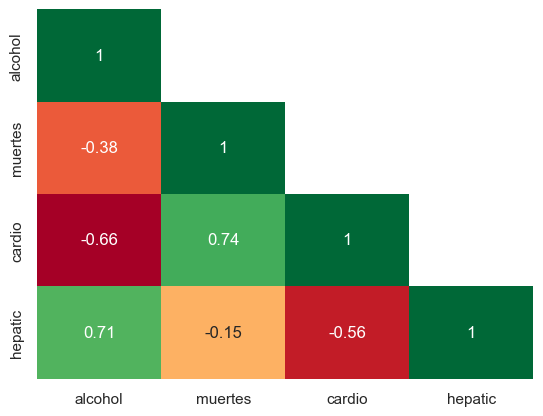

In [43]:
sns.heatmap(c, annot = True, mask = mask, cmap = 'RdYlGn', cbar = False)